<h1 style="text-align: center;">IOOS QARTOD software (ioos_qc)</h1>

---
![image.png](https://cdn.ioos.noaa.gov/media/2019/05/qartodlogo2.jpg)



<p style="text-align: center;">
    Mathew Biddle<br>
    mathew.biddle@noaa.gov<br>
    <a href="https://orcid.org/0000-0003-4897-1669">https://orcid.org/0000-0003-4897-1669</a><br>
    NOAA/NOS/IOOS<br>
</p>

<sub>Materials available at <a href="https://github.com/MathewBiddle/WIO_workshop">https://github.com/MathewBiddle/WIO_workshop</a>.</sub>

This presentation will demonstrate how to [run ``ioos_qc``](https://github.com/ioos/ioos_qc) on a time-series dataset. ``ioos_qc`` implements the [Quality Assurance / Quality Control of Real Time Oceanographic Data (QARTOD)](https://ioos.noaa.gov/project/qartod/).

### Key Objectives of QARTOD

* Establish authoritative QA/QC procedures for the [U.S. IOOS core variables](http://www.iooc.us/task-teams/core-ioos-variables/), as necessary, including detailed information about the sensors and procedures used to measure the variables.

* Produce written manuals for these QA/QC procedures

* From the list of individual QA/QC procedures and guidelines developed, define a baseline set of QA/QC procedures that can be used for certification of RCOOS data providers

* Facilitate QA/QC integration with Global Ocean Observing System (GOOS) and other international ocean observation efforts

* Engage the Federal Agencies and IOOS Regions that are part of, or contribute to, US IOOS who will use the established QA/QC procedure

* Work efficiently, without duplication of effort, to facilitate the implementation of common QA/QC procedures amongst US IOOS Partners.

## Load data

We will be using the water level data from a [fixed station in Kotzebue, AK](https://www.google.com/maps?q=66.895035,-162.566752).

![map](http://erddap.aoos.org/erddap/tabledap/kotzebue-alaska-water-level.png?longitude,latitude,z&time%3E=2021-06-23T00%3A00%3A00Z&time%3C=2021-06-30T00%3A00%3A00Z&longitude%3E=-180&longitude%3C=-116&latitude%3E=26&latitude%3C=90&.draw=markers&.marker=5%7C5&.color=0x000000&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff)

We will get the data from the [AOOS ERDDAP server](http://erddap.aoos.org/erddap/). 

In [1]:
from erddapy import ERDDAP

e = ERDDAP(
    server="http://erddap.aoos.org/erddap/",
    protocol="tabledap"
)

e.dataset_id = "kotzebue-alaska-water-level"

e.constraints = {
    "time>=": "2018-09-05T21:00:00Z",
    "time<=": "2019-07-10T19:00:00Z",
}

## Return data and metadata

In [2]:
import json
import warnings
warnings.filterwarnings('ignore')

def nice_print(indict):
    return print(json.dumps(indict, indent=2, default=str))

In [3]:
import cf_xarray

data = e.to_xarray()

data

<xarray.Dataset>
Dimensions:                                                 (timeseries: 1,
                                                             obs: 7241)
Coordinates:
    latitude                                                (timeseries) float64 ...
    longitude                                               (timeseries) float64 ...
    time                                                    (obs) datetime64[ns] ...
Dimensions without coordinates: timeseries, obs
Data variables:
    station                                                 (timeseries) object ...
    rowSize                                                 (timeseries) int32 ...
    z                                                       (obs) float64 ...
    sea_surface_height_above_sea_level_geoid_mhhw           (obs) float64 ...
    sea_surface_height_above_sea_level_geoid_mhhw_qc_agg    (obs) float64 ...
    sea_surface_height_above_sea_level_geoid_mhhw_qc_tests  (obs) float64 ...
Attributes: (12/54)
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             ,sales@stilltek.com,dugan@aoos.org,feedbac...
    contributor_name:              NOAA Alaska-Pacific River Forecast Center ...
    contributor_role:              contributor,collaborator,sponsor,processor
    contributor_role_vocabulary:   NERC
    ...                            ...
    station_id:                    100053
    summary:                       Timeseries data from 'Kotzebue, Alaska, Wa...
    time_coverage_end:             2019-07-10T19:00:00Z
    time_coverage_start:           2018-09-05T21:00:00Z
    title:                         Kotzebue, Alaska, Water Level
    Westernmost_Easting:           -162.566752

In [4]:
data.cf

Coordinates:
- CF Axes:   X: ['longitude']
             Y: ['latitude']
             T: ['time']
             Z: n/a

- CF Coordinates:   longitude: ['longitude']
                    latitude: ['latitude']
                    time: ['time']
                    vertical: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   latitude: ['latitude']
                    longitude: ['longitude']
                    time: ['time']

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   aggregate_quality_flag: ['sea_surface_height_above_sea_level_geoid_mhhw_qc_agg']
                    altitude: ['z']
                    sea_surface_height_above_sea_level: ['sea_surface_height_above_sea_level_geoid_mhhw']
                    sea_surface_height_above_sea_level quality_flag: ['sea_surface_height_above_sea_level_geoid_mhhw_qc_tests']

- Bounds:   n/a

In [5]:
data.cf.axes

{'X': ['longitude'], 'Y': ['latitude'], 'T': ['time']}

In [6]:
data.cf.coordinates

{'longitude': ['longitude'], 'latitude': ['latitude'], 'time': ['time']}

In [7]:
data.cf.standard_names

{'latitude': ['latitude'],
 'longitude': ['longitude'],
 'time': ['time'],
 'altitude': ['z'],
 'sea_surface_height_above_sea_level': ['sea_surface_height_above_sea_level_geoid_mhhw'],
 'aggregate_quality_flag': ['sea_surface_height_above_sea_level_geoid_mhhw_qc_agg'],
 'sea_surface_height_above_sea_level quality_flag': ['sea_surface_height_above_sea_level_geoid_mhhw_qc_tests']}

## Let's plot the raw data

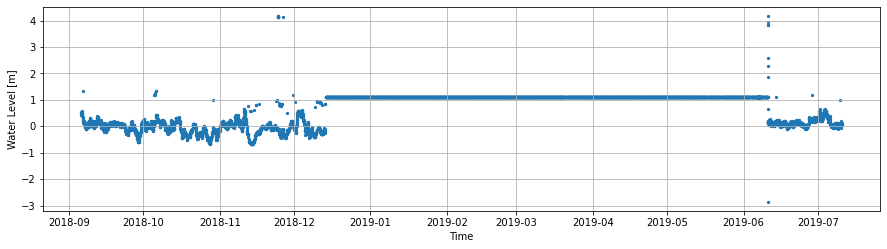

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 3.75))

data.cf.plot.scatter('time','sea_surface_height_above_sea_level', ax=ax, s=5)

ax.grid(True)

# Build the QC configuration

Below we create a simple Quality Assurance/Quality Control (QA/QC) configuration that will be used as input for ``ioos_qc``. All the interval values are in the same units as the data.

For more information on the tests and recommended values for QA/QC check the documentation of each test and its inputs: 
https://ioos.github.io/ioos_qc/api/ioos_qc.html#module-ioos_qc.qartod

[Manual for Real-Time Quality Control of Water Level Data](https://cdn.ioos.noaa.gov/media/2021/04/QARTOD_WaterLevelManual_Update_V2.1_Final.pdf)

In [9]:
qc_config = {
    "qartod": {
        
      "gross_range_test": {
            "fail_span":    [-10, 10],
            "suspect_span": [ -2,  3]
      },
        
      "flat_line_test": {
            "tolerance":         0.001,
            "suspect_threshold": 10800,
            "fail_threshold":    21600
      },
        
      "spike_test": {
            "suspect_threshold": 0.8,
            "fail_threshold":      3,
      }
    }
}

In [10]:
nice_print(qc_config)

{
  "qartod": {
    "gross_range_test": {
      "fail_span": [
        -10,
        10
      ],
      "suspect_span": [
        -2,
        3
      ]
    },
    "flat_line_test": {
      "tolerance": 0.001,
      "suspect_threshold": 10800,
      "fail_threshold": 21600
    },
    "spike_test": {
      "suspect_threshold": 0.8,
      "fail_threshold": 3
    }
  }
}


For `flat_line_test`:

* 10800 seconds = 3 hours
* 21600 seconds = 6 hours

# Run the QC tests with the supplied configuration

In [11]:
data.cf.describe

<bound method CFAccessor.describe of Coordinates:
- CF Axes:   X: ['longitude']
             Y: ['latitude']
             T: ['time']
             Z: n/a

- CF Coordinates:   longitude: ['longitude']
                    latitude: ['latitude']
                    time: ['time']
                    vertical: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   latitude: ['latitude']
                    longitude: ['longitude']
                    time: ['time']

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   aggregate_quality_flag: ['sea_surface_height_above_sea_level_geoid_mhhw_qc_agg']
                    altitude: ['z']
                    sea_surface_height_above_sea_level: ['sea_surface_height_above_sea_level_geoid_mhhw']
                    sea_surface_height_above_sea_level quality_flag: ['sea_surface_height_above_sea_level_geoid_mhhw_qc_tests']

- Bounds:   n/a
>

In [12]:
from ioos_qc.config import QcConfig

qc = QcConfig(qc_config)

variable_name = data.cf.standard_names["sea_surface_height_above_sea_level"][0]

qc_results =  qc.run(
    inp=data[variable_name],
    tinp=data.cf["time"],
)

nice_print(qc_results['qartod'])

{
  "gross_range_test": "[1 1 1 ... 1 1 1]",
  "flat_line_test": "[1 1 1 ... 1 1 1]",
  "spike_test": "[2 1 1 ... 1 1 2]"
}


The results are returned in a dictionary format, similar to the input configuration, with a mask for each test. The results range from 1 to 4 meaning:

**flag** | **meaning** 
---------:|:------------
 1 | data passed the QA/QC 
 2 | did not run on this data point 
 3 | flag as suspect 
 4 | flag as failed 

In [13]:
%matplotlib inline

import numpy as np

def plot_results(data, variable_name, results, title, test_name):
    time = data.cf["time"]
    obs = data[variable_name]
    qc_test = results["qartod"][test_name]

    qc_pass = np.ma.masked_where(qc_test != 1, obs)
    qc_notrun = np.ma.masked_where(qc_test != 2, obs)
    qc_suspect = np.ma.masked_where(qc_test != 3, obs)
    qc_fail = np.ma.masked_where(qc_test != 4, obs)
    
    fig, ax = plt.subplots(figsize=(15, 3.75))
    fig.set_title = f"{test_name}: {title}"
    
    ax.set_xlabel(f"{time.long_name}")
    ax.set_ylabel(f"{data[variable_name].long_name} [{data[variable_name].units}]")

    kw = {"marker": "o", "linestyle": "none"}
    ax.plot(time, obs,  label="obs", color="#A6CEE3")
    ax.plot(time, qc_notrun, markersize=2, label="qc not run", color="gray", alpha=0.2, **kw)
    ax.plot(time, qc_pass, markersize=4, label="qc pass", color="green", alpha=0.5, **kw)
    ax.plot(time, qc_suspect, markersize=4, label="qc suspect", color="orange", alpha=0.7, **kw)
    ax.plot(time, qc_fail, markersize=6, label="qc fail", color="red", alpha=1.0, **kw)
    ax.grid(True)

title = "Water Level [MHHW] [m] : Kotzebue, AK"

## Let's look at the `gross_range` test results
The gross range test test should fail data outside the $\pm$ 10 range and suspect data below -2, and greater than 3. As one can easily see all the major spikes are flagged as expected.

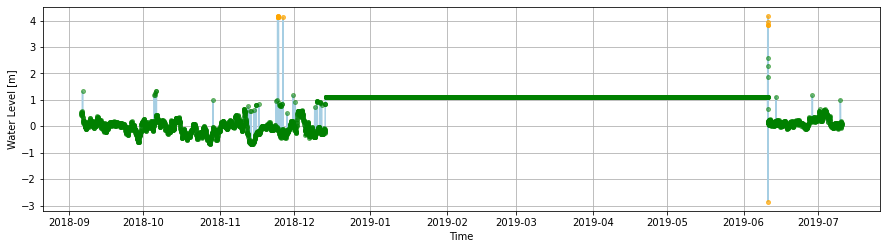

In [14]:
plot_results(
    data,
    variable_name,
    qc_results,
    title,
    "gross_range_test"
)

In [15]:
qc_config['qartod']['gross_range_test']

{'fail_span': [-10, 10], 'suspect_span': [-2, 3]}

## Let's look at the `spike` test results

An actual spike test, based on a data increase threshold, flags similar spikes to the gross range test but also indetifies other suspect unusual increases in the series.

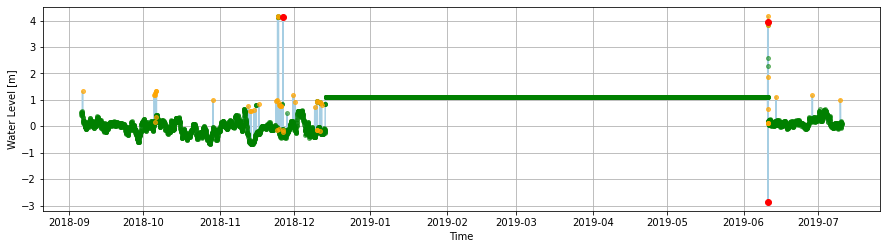

In [16]:
plot_results(
    data,
    variable_name,
    qc_results,
    title,
    "spike_test"
)

In [17]:
qc_config['qartod']['spike_test']

{'suspect_threshold': 0.8, 'fail_threshold': 3}

## Let's look at the `flat_line` test results

The flat line test identifies issues with the data where values are "stuck."

`ioos_qc` succefully identified a huge portion of the data where that happens and flagged a smaller one as suspect. (Zoom in the red point to the left to see this one.)

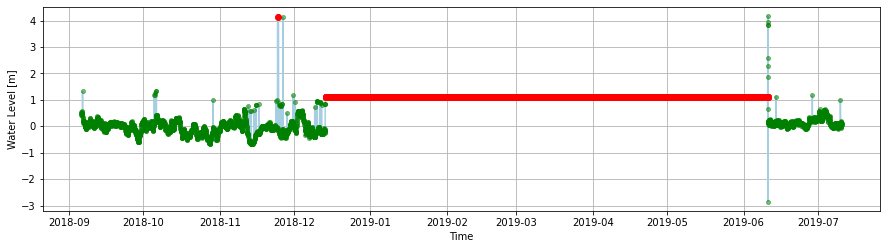

In [18]:
plot_results(
    data,
    variable_name,
    qc_results,
    title,
    "flat_line_test"
)

In [19]:
qc_config['qartod']['flat_line_test']

{'tolerance': 0.001, 'suspect_threshold': 10800, 'fail_threshold': 21600}

This notebook was adapt from Jessica Austin and Kyle Wilcox's [original ioos_qc examples](https://github.com/ioos/ioos_qc/blob/b34b3762d659362fb3af11f52d8905d18cd6ec7b/docs/source/examples/QartodTestExample_WaterLevel.ipynb). Please [see the ``ioos_qc`` documentation](https://ioos.github.io/ioos_qc/) for more examples.